*Comparison of Netflix's subscriber and Netflix's revenue($) growth from Q1-2018 to Q2-2020 by region
*
##### Thank you for opening this kernel!
Netflix has 182.8 million subscribers, making it one of the world’s largest entertainment services.

# Aim:
> In this report we are seeing how Netflix’s subscription figures and Netflix's revenue($) have grown in four different regions: 
>  1. the United States and Canada, 
>  2. Europe, the Middle East, and Africa,
>  3. Latin America,
>  4. Asia-Pacific 
> over the last 2.5 years.

### Step one: Exploratory data analysis
> Before starting, I would like to mention that my purpose of the report is how technology can positively affect Netflix subscribers and revenue growth. On the other hand, according to the final month of the quarter 2020(March) was being the start of the global coronavirus pandemic in many countries, Netflix noted that it added 26 million paid new subscribers in the first two quarters of 2020 alone; in 2019, the company added 28 million subscribers in total.
### Step two: Visualization 

*Source of data: 
*

[](http://)https://www.theverge.com/2020/7/16/21326434/netflix-second-quarter-earnings-tv-shows-movies-originals-subscribers-adds-ted-sarandos
[](http://)https://www.comparitech.com/tv-streaming/netflix-subsc

In [1]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Import the necessary packages
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action ="ignore")

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

netflix2020



In [2]:
# Load Dataset
df_subscribers = pd.read_csv("../input/netflix2020/NetflixSubscribersbyCountryfrom2018toQ2_2020.csv")

df_revenue  = pd.read_csv("../input/netflix2020/NetflixsRevenue2018toQ2_2020.csv")

df_subscribers_V2 = pd.read_csv("../input/netflix2020/DataNetflixSubscriber2020_V2.csv")

df_revenue_V2 = pd.read_csv("../input/netflix2020/DataNetflixRevenue2020_V2.csv")

In [3]:
df_subscribers.head()

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,60909000,61870000,63010000,64757000,66633000,66501000,67114000,67662000,69969000,72904000
1,"Europe, Middle East, and Africa",29339000,31317000,33836000,37818000,42542000,44229000,47355000,51778000,58734000,61483000
2,Latin America,21260000,22795000,24115000,26077000,27547000,27890000,29380000,31417000,34318000,36068000
3,Asia-Pacific,7394000,8372000,9461000,10607000,12141000,12942000,14485000,16233000,19835000,22492000


In [4]:
df_revenue.head()

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1976157000,2049546000,2094850000,2160979000,2256851000,2501199000,2621250000,2671908000,2702776000,2839670000
1,"Europe, Middle East, and Africa",886649000,975497000,1004749000,1096812000,1233379000,1319087000,1428040000,1562561000,1723474000,1892537000
2,Latin America,540182000,568071000,562307000,567137000,630472000,677136000,741434000,746392000,793453000,785368000
3,Asia-Pacific,199117000,221252000,248691000,276756000,319602000,349494000,382304000,418121000,483660000,569140000


In [5]:
df_subscribers_V2.head()

,Area,Years,Subscribers
0,United States and Canada,Q1 - 2018,60909000
1,"Europe, Middle East and Africa",Q1 - 2018,29339000
2,Latin America,Q1 - 2018,21260000
3,Asia-Pacific,Q1 - 2018,7394000
4,United States and Canada,Q2 - 2018,61870000


In [6]:
df_revenue_V2.head()

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
1,"Europe, Middle East and Africa",Q1 - 2018,886649000
2,Latin America,Q1 - 2018,540182000
3,Asia-Pacific,Q1 - 2018,199117000
4,United States and Canada,Q2 - 2018,2049546000


#### Analyse statically insight of data

In [7]:
df_subscribers.describe()

,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
mean,2.972550e+07,3.108850e+07,3.260550e+07,3.481475e+07,3.721575e+07,3.789050e+07,3.958350e+07,4.177250e+07,4.571400e+07,4.823675e+07
std,2.267834e+07,2.260070e+07,2.261050e+07,2.286133e+07,2.320899e+07,2.295775e+07,2.274768e+07,2.258228e+07,2.278462e+07,2.305650e+07
min,7.394000e+06,8.372000e+06,9.461000e+06,1.060700e+07,1.214100e+07,1.294200e+07,1.448500e+07,1.623300e+07,1.983500e+07,2.249200e+07
25%,1.779350e+07,1.918925e+07,2.045150e+07,2.220950e+07,2.369550e+07,2.415300e+07,2.565625e+07,2.762100e+07,3.069725e+07,3.267400e+07
50%,2.529950e+07,2.705600e+07,2.897550e+07,3.194750e+07,3.504450e+07,3.605950e+07,3.836750e+07,4.159750e+07,4.652600e+07,4.877550e+07
75%,3.723150e+07,3.895525e+07,4.112950e+07,4.455275e+07,4.856475e+07,4.979700e+07,5.229475e+07,5.574900e+07,6.154275e+07,6.433825e+07
max,6.090900e+07,6.187000e+07,6.301000e+07,6.475700e+07,6.663300e+07,6.650100e+07,6.711400e+07,6.766200e+07,6.996900e+07,7.290400e+07


In [8]:
df_revenue.describe()

,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
mean,9.005262e+08,9.535915e+08,9.776492e+08,1.025421e+09,1.110076e+09,1.211729e+09,1.293257e+09,1.349746e+09,1.425841e+09,1.521679e+09
std,7.700643e+08,7.929992e+08,8.067964e+08,8.296811e+08,8.534568e+08,9.492975e+08,9.859134e+08,1.004218e+09,1.001127e+09,1.052635e+09
min,1.991170e+08,2.212520e+08,2.486910e+08,2.767560e+08,3.196020e+08,3.494940e+08,3.823040e+08,4.181210e+08,4.836600e+08,5.691400e+08
25%,4.549158e+08,4.813662e+08,4.839030e+08,4.945418e+08,5.527545e+08,5.952255e+08,6.516515e+08,6.643242e+08,7.160048e+08,7.313110e+08
50%,7.134155e+08,7.717840e+08,7.835280e+08,8.319745e+08,9.319255e+08,9.981115e+08,1.084737e+09,1.154476e+09,1.258464e+09,1.338952e+09
75%,1.159026e+09,1.244009e+09,1.277274e+09,1.362854e+09,1.489247e+09,1.614615e+09,1.726342e+09,1.839898e+09,1.968300e+09,2.129320e+09
max,1.976157e+09,2.049546e+09,2.094850e+09,2.160979e+09,2.256851e+09,2.501199e+09,2.621250e+09,2.671908e+09,2.702776e+09,2.839670e+09


In [9]:
df_subscribers_V2.describe()

,Subscribers
count,4.000000e+01
mean,3.786472e+07
std,2.085136e+07
min,7.394000e+06
25%,2.218400e+07
50%,3.262650e+07
75%,6.105250e+07
max,7.290400e+07


In [10]:
df_revenue_V2.describe()

,Revenue
count,4.000000e+01
mean,1.176952e+09
std,8.246170e+08
min,1.991170e+08
25%,5.567758e+08
50%,8.400510e+08
75%,1.913442e+09
max,2.839670e+09


In [11]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       4 non-null      object
 1   Q1 - 2018  4 non-null      int64 
 2   Q2 - 2018  4 non-null      int64 
 3   Q3 - 2018  4 non-null      int64 
 4   Q4 - 2018  4 non-null      int64 
 5   Q1 - 2019  4 non-null      int64 
 6   Q2 - 2019  4 non-null      int64 
 7   Q3 - 2019  4 non-null      int64 
 8   Q4 - 2019  4 non-null      int64 
 9   Q1 - 2020  4 non-null      int64 
 10  Q2 - 2020  4 non-null      int64 
dtypes: int64(10), object(1)
memory usage: 480.0+ bytes


In [12]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       4 non-null      object
 1   Q1 - 2018  4 non-null      int64 
 2   Q2 - 2018  4 non-null      int64 
 3   Q3 - 2018  4 non-null      int64 
 4   Q4 - 2018  4 non-null      int64 
 5   Q1 - 2019  4 non-null      int64 
 6   Q2 - 2019  4 non-null      int64 
 7   Q3 - 2019  4 non-null      int64 
 8   Q4 - 2019  4 non-null      int64 
 9   Q1 - 2020  4 non-null      int64 
 10  Q2 - 2020  4 non-null      int64 
dtypes: int64(10), object(1)
memory usage: 480.0+ bytes


In [13]:
df_subscribers_V2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         40 non-null     object
 1   Years        40 non-null     object
 2   Subscribers  40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [14]:
df_revenue_V2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     40 non-null     object
 1   Years    40 non-null     object
 2   Revenue  40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [15]:
df_subscribers.columns

Index(['Area', 'Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019',
       'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020'],
      dtype='object')

In [16]:
df_revenue.columns

Index(['Area', 'Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019',
       'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020'],
      dtype='object')

In [17]:
df_subscribers_V2.columns

Index(['Area', 'Years', 'Subscribers'], dtype='object')

In [18]:
df_revenue_V2.columns

Index(['Area', 'Years', 'Revenue'], dtype='object')

In [19]:
print(f"The subscribers data size: {df_subscribers.shape}")
print(f"The revenue data size: {df_revenue.shape}")
print(f"The subscribers data size (V2): {df_subscribers_V2.shape}")
print(f"The revenue data size (V2): {df_revenue_V2.shape}")

The subscribers data size: (4, 11)
The revenue data size: (4, 11)
The subscribers data size (V2): (40, 3)
The revenue data size (V2): (40, 3)


## Netflix's subscriber from 2018 to Q2 2020 by region.

Text(0, 0.5, "Netflix's subscribers (M)")

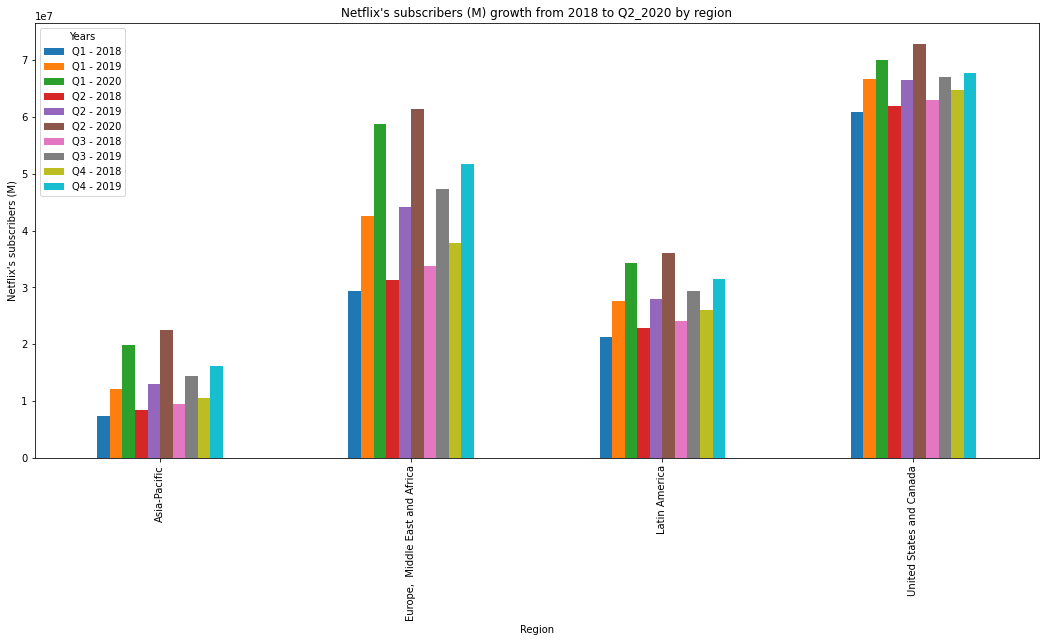

In [20]:
df_subscribers_V2.groupby(["Area", "Years"])["Subscribers"].sum().unstack("Years").plot(figsize=(18, 8), kind="bar")
plt.title("Netflix's subscribers (M) growth from 2018 to Q2_2020 by region")
plt.xlabel("Region")
plt.ylabel("Netflix's subscribers (M)")

In [21]:
years = ["Q1 - 2018", "Q2 - 2018", "Q3 - 2018", "Q4 - 2018", "Q1 - 2019", "Q2 - 2019", "Q3 - 2019", "Q4 - 2019", "Q1 - 2020", "Q2 - 2020"]

data = {"Period" : years,
        "United States and Canada": [60909000, 61870000, 63010000, 64757000, 66633000, 66501000, 67114000, 67662000, 69969000,                 72904000],
        "Europe, Middle East, and Africa": [29339000, 31317000, 33836000, 37818000, 42542000, 44229000, 47355000, 51778000, 58734000,          61483000],
        "Latin America": [21260000, 22795000, 24115000, 26077000, 27547000, 27890000, 29380000, 31417000, 34318000, 36068000],
        "Asia-Pacific": [7394000, 8372000, 9461000, 10607000, 12141000, 12942000, 14485000, 16233000, 19835000, 22492000]
        }

source = ColumnDataSource(data=data)

p = figure(x_range=data["Period"], y_range=(0, 100000000), plot_height=500, plot_width=1200, title="Netflix's subscriber from Q1-2018 to Q2-2020 by region", toolbar_location=None, tools="")

p.vbar(x=dodge("Period", -0.30, range=p.x_range), top="United States and Canada", width=0.15, color="#8B0000", source=source, legend_label="United States and Canada")

p.vbar(x=dodge("Period", -0.15,  range=p.x_range), top="Europe, Middle East, and Africa", width=0.15, color="#B22222", source=source, legend_label="Europe, Middle East, and Africa")

p.vbar(x=dodge("Period", -0.00, range=p.x_range), top="Latin America", width=0.15, color="#CD5C5C", source=source, legend_label="Latin America")

p.vbar(x=dodge("Period", 0.15, range=p.x_range), top="Asia-Pacific", width=0.15, color="#F08080", source=source, legend_label="Asia-Pacific")

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.title.text_font_size = "16pt"

show(p)

![](https://pariaagharabi.github.io/images/chart-netflix-subscribers.png)

## Netflix's revenue($) growth from 2018 to Q2_2020 by region  

Text(0, 0.5, "Netflix's revenue ($)")

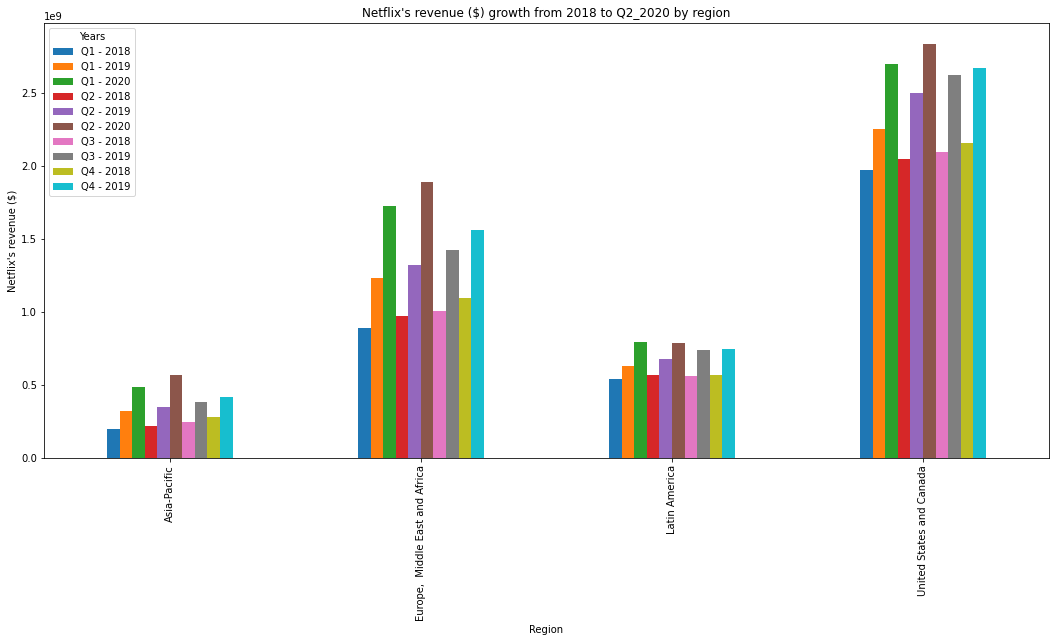

In [22]:
df_revenue_V2.groupby(["Area", "Years"])["Revenue"].sum().unstack("Years").plot(figsize=(18, 8), kind="bar")
plt.title("Netflix's revenue ($) growth from 2018 to Q2_2020 by region")
plt.xlabel("Region")
plt.ylabel("Netflix's revenue ($)")

In [23]:
years = ["Q1 - 2018", "Q2 - 2018", "Q3 - 2018", "Q4 - 2018", "Q1 - 2019", "Q2 - 2019", "Q3 - 2019", "Q4 - 2019", "Q1 - 2020", "Q2 - 2020"]

data = {"Period" : years,
        "United States and Canada": [1976157000, 2049546000, 2094850000, 2160979000, 2256851000, 2501199000, 2621250000, 2671908000,           2702776000, 2839670000],
        "Europe, Middle East, and Africa": [886649000, 975497000, 1004749000, 1096812000, 1233379000, 1319087000, 1428040000,                  1562561000, 1723474000, 1892537000],
        "Latin America": [540182000, 568071000, 562307000, 567137000, 630472000, 677136000, 741434000, 746392000, 793453000,                   785368000],
        "Asia-Pacific": [199117000, 221252000, 248691000, 276756000, 319602000, 349494000, 382304000, 418121000, 483660000, 569140000]
        }

source = ColumnDataSource(data=data)

p = figure(x_range=data["Period"], y_range=(0, 3000000000), plot_height=500, plot_width=1200, title="Netflix's revenue from Q1-2018 to Q2-2020 by region", toolbar_location=None, tools="")

p.vbar(x=dodge("Period", -0.30, range=p.x_range), top="United States and Canada", width=0.15, color="#8B0000", source=source, legend_label="United States and Canada")

p.vbar(x=dodge("Period", -0.15,  range=p.x_range), top="Europe, Middle East, and Africa", width=0.15, color="#B22222", source=source, legend_label="Europe, Middle East, and Africa")

p.vbar(x=dodge("Period", -0.00, range=p.x_range), top="Latin America", width=0.15, color="#CD5C5C", source=source, legend_label="Latin America")

p.vbar(x=dodge("Period", 0.15, range=p.x_range), top="Asia-Pacific", width=0.15, color="#F08080", source=source, legend_label="Asia-Pacific")

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.title.text_font_size = "16pt"

show(p)

![](https://pariaagharabi.github.io/images/chart-netflix-income.png)

Thank you for taking the time to read through my kernel. For the moment, let me know if you found this notebook useful or you just liked it: I would really appreciate it!